In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_US=df[(df['job_title_short']=="Data Analyst")& (df['job_country']=="United States")].copy()

In [8]:
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)



,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [19]:
df_DA_skills=df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count','median':'median_salary'})

DA_job_count= len(df_DA_US)

df_DA_skills['skill_percent']= df_DA_skills['skill_count']/DA_job_count * 100

skill_percent=5

df_DA_skills_high_demand= df_DA_skills[df_DA_skills['skill_percent']>=skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


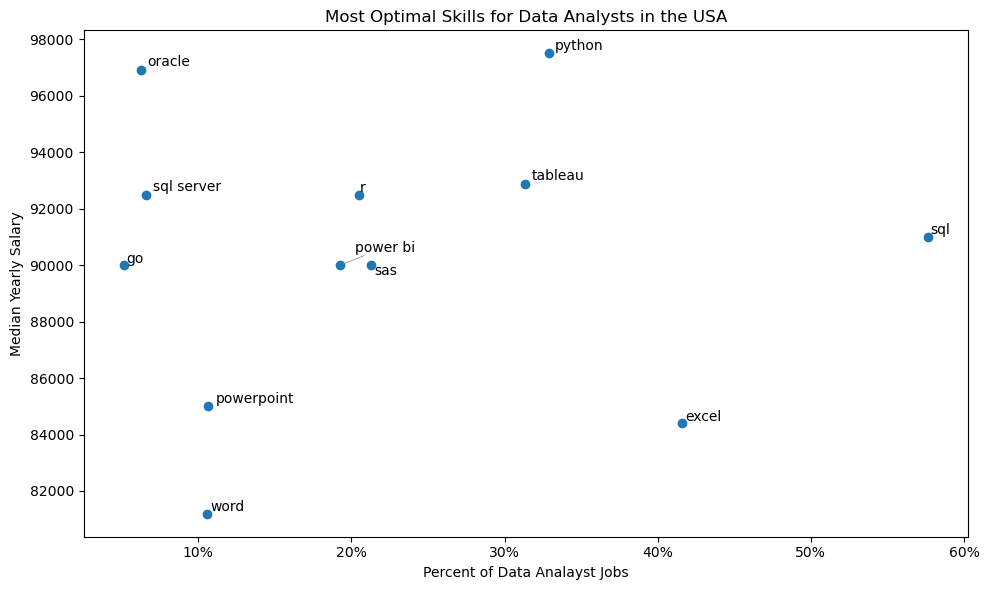

In [25]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# If skill_percent is not defined earlier, define it (or remove from title)
# skill_percent = 15

fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot
ax.scatter(
    df_DA_skills_high_demand["skill_percent"],
    df_DA_skills_high_demand["median_salary"]
)

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(
        ax.text(
            df_DA_skills_high_demand["skill_percent"].iloc[i],
            df_DA_skills_high_demand["median_salary"].iloc[i],
            str(txt)
        )
    )

# Adjust text to avoid overlap
adjust_text(
    texts,
    ax=ax,
    arrowprops=dict(arrowstyle="->", color="gray", lw=0.5)
)

from matplotlib.ticker import PercentFormatter
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Labels + title
ax.set_xlabel("Percent of Data Analayst Jobs")
ax.set_ylabel("Median Yearly Salary")
ax.set_title("Most Optimal Skills for Data Analysts in the USA")

plt.tight_layout()
plt.show()
